# WeatherPy
----

In [1]:
# Dependencies
from citipy import citipy
from config import api_key
from datetime import datetime
from pprint import pprint
from scipy.stats import linregress
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import scipy.stats as st
import time

# Set lat and lng ranges
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# Create empty lists to store values
lats_lngs = []
cities = []

# Generate random lats and lngs
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lats_lngs = zip(lats, lngs)

# Find closest cities to generated coordinates using citipy
for lat_lng in lats_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If city is unique, add it to cities list
    if city not in cities:
        cities.append(city)
        
# Count number of cities generated
len(cities)

613

In [3]:
cities

['georgetown',
 'arraial do cabo',
 'meiganga',
 'saint-philippe',
 'ribeira grande',
 'mandera',
 'vaini',
 'hilo',
 'bredasdorp',
 'chuy',
 'east london',
 'beveren',
 'cape town',
 'hermanus',
 'bekhtery',
 'lebu',
 'bambous virieux',
 'klaksvik',
 'lazaro cardenas',
 'erenhot',
 'atuona',
 'fortuna',
 'ban tak',
 'sitka',
 'los llanos de aridane',
 'rikitea',
 'port alfred',
 'mataura',
 'kodiak',
 'ostrovnoy',
 'mwense',
 'iida',
 'yulara',
 'qaanaaq',
 'vestmannaeyjar',
 'chikwawa',
 'roma',
 'puerto quijarro',
 'amderma',
 'nizhneyansk',
 'clyde river',
 'butaritari',
 'valdivia',
 'omsukchan',
 'belushya guba',
 'sault sainte marie',
 'hobart',
 'henties bay',
 'sergeyevka',
 'buala',
 'vardo',
 'ushuaia',
 'mar del plata',
 'taolanaro',
 'salcedo',
 'onokhino',
 'tasiilaq',
 'kazalinsk',
 'freeport',
 'vallenar',
 'husavik',
 'asau',
 'carnarvon',
 'cherskiy',
 'petropavlovsk-kamchatskiy',
 'nizwa',
 'alyangula',
 'tafalla',
 'praia da vitoria',
 'balabac',
 'mount isa',
 'lon

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{base_url}appid={api_key}&units={units}&q="

In [5]:
# Retrieve data from all randomly generated cities
# Create empty lists to store data of cities
lat = []
lon = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# Set initial values of counters
count = 0
set = 1

print("Beginning Data Retrieval")
print("-----------------------------")

# Loop over a list while keeping track of indexes
for index, city in enumerate(cities):
    count += 1
    if count == 51:
        count = 1
        set += 1
        time.sleep(5)
    print(f'Processing Record {count} of Set {set} | {city}')
    
    try:
        response = requests.get(query_url + city).json()
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        
    except:
        print("City not found. Skipping...")
        # Append NaN values to ensure row counts match cities (for creating DataFrame)
        lat.append(np.nan)
        lon.append(np.nan)
        max_temp.append(np.nan)
        humidity.append(np.nan)
        cloudiness.append(np.nan)
        wind_speed.append(np.nan)
        country.append(np.nan)
        date.append(np.nan)
        

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | georgetown
Processing Record 2 of Set 1 | arraial do cabo
Processing Record 3 of Set 1 | meiganga
Processing Record 4 of Set 1 | saint-philippe
Processing Record 5 of Set 1 | ribeira grande
Processing Record 6 of Set 1 | mandera
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | hilo
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | chuy
Processing Record 11 of Set 1 | east london
Processing Record 12 of Set 1 | beveren
Processing Record 13 of Set 1 | cape town
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | bekhtery
Processing Record 16 of Set 1 | lebu
Processing Record 17 of Set 1 | bambous virieux
Processing Record 18 of Set 1 | klaksvik
Processing Record 19 of Set 1 | lazaro cardenas
Processing Record 20 of Set 1 | erenhot
Processing Record 21 of Set 1 | atuona
Processing Record 22 of Set 1 | fortuna
Processing Record 23 of Set 1 | 

Processing Record 38 of Set 4 | dalbandin
Processing Record 39 of Set 4 | tres picos
Processing Record 40 of Set 4 | teocaltiche
Processing Record 41 of Set 4 | baisha
Processing Record 42 of Set 4 | hamilton
Processing Record 43 of Set 4 | colwyn bay
Processing Record 44 of Set 4 | joshimath
Processing Record 45 of Set 4 | pemangkat
Processing Record 46 of Set 4 | sorkjosen
Processing Record 47 of Set 4 | port elizabeth
Processing Record 48 of Set 4 | dikson
Processing Record 49 of Set 4 | conde
Processing Record 50 of Set 4 | hualmay
Processing Record 1 of Set 5 | katsuura
Processing Record 2 of Set 5 | le vauclin
Processing Record 3 of Set 5 | shirokiy
Processing Record 4 of Set 5 | srednekolymsk
Processing Record 5 of Set 5 | zabol
Processing Record 6 of Set 5 | ilulissat
Processing Record 7 of Set 5 | palimbang
Processing Record 8 of Set 5 | miraflores
Processing Record 9 of Set 5 | hasaki
Processing Record 10 of Set 5 | avarua
Processing Record 11 of Set 5 | malanville
Processing

Processing Record 29 of Set 8 | victoria
Processing Record 30 of Set 8 | genhe
Processing Record 31 of Set 8 | lavrentiya
Processing Record 32 of Set 8 | batemans bay
Processing Record 33 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 34 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 35 of Set 8 | brenham
Processing Record 36 of Set 8 | verkhnevilyuysk
Processing Record 37 of Set 8 | aktau
Processing Record 38 of Set 8 | kununurra
Processing Record 39 of Set 8 | watertown
Processing Record 40 of Set 8 | shenjiamen
Processing Record 41 of Set 8 | lishui
Processing Record 42 of Set 8 | mirzapur
Processing Record 43 of Set 8 | trat
Processing Record 44 of Set 8 | axim
Processing Record 45 of Set 8 | tarko-sale
Processing Record 46 of Set 8 | oranjemund
Processing Record 47 of Set 8 | eureka
Processing Record 48 of Set 8 | cleveland
Processing Record 49 of Set 8 | kropotkin
Processing Record 50 of Set 8 | bay roberts
Processing Record 1 of Set 9

Processing Record 17 of Set 12 | saleaula
City not found. Skipping...
Processing Record 18 of Set 12 | pala
Processing Record 19 of Set 12 | andenes
Processing Record 20 of Set 12 | sinnar
Processing Record 21 of Set 12 | aklavik
Processing Record 22 of Set 12 | rawannawi
City not found. Skipping...
Processing Record 23 of Set 12 | svetlyy
Processing Record 24 of Set 12 | kurumkan
Processing Record 25 of Set 12 | huarmey
Processing Record 26 of Set 12 | aktas
Processing Record 27 of Set 12 | zverinogolovskoye
Processing Record 28 of Set 12 | balingasay
Processing Record 29 of Set 12 | pisco
Processing Record 30 of Set 12 | ankazoabo
Processing Record 31 of Set 12 | mackay
Processing Record 32 of Set 12 | kamaishi
Processing Record 33 of Set 12 | abu jubayhah
City not found. Skipping...
Processing Record 34 of Set 12 | north las vegas
Processing Record 35 of Set 12 | geraldton
Processing Record 36 of Set 12 | napanee
Processing Record 37 of Set 12 | togur
Processing Record 38 of Set 12 

### Convert Raw Data to DataFrame

In [6]:
# Place data into a DataFrame
city_weather_df = pd.DataFrame({"City": cities,
                               "Lat": lat,
                               "Lng": lon,
                               "Max Temp": max_temp,
                               "Humidity": humidity,
                               "Cloudiness": cloudiness,
                               "Wind Speed": wind_speed,
                               "Country": country,
                               "Date": date})
# Drop null values
city_weather_df = city_weather_df.dropna()
print(city_weather_df.count())

# Export city data into a csv file
city_weather_df.to_csv("./output/city_weather_data.csv", index=False)

# Read into saved csv file
weather_df = pd.read_csv("./output/city_weather_data.csv")
weather_df

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,georgetown,5.41,100.34,26.00,83.0,20.0,3.10,MY,1.601638e+09
1,arraial do cabo,-22.97,-42.03,26.00,78.0,23.0,5.70,BR,1.601638e+09
2,meiganga,6.52,14.30,27.30,64.0,93.0,2.60,CM,1.601639e+09
3,saint-philippe,-21.36,55.77,25.00,69.0,90.0,3.60,RE,1.601638e+09
4,ribeira grande,38.52,-28.70,21.00,73.0,75.0,3.60,PT,1.601638e+09
...,...,...,...,...,...,...,...,...,...
558,north bend,43.41,-124.22,13.89,100.0,90.0,3.10,US,1.601639e+09
559,linqiong,30.42,103.46,23.33,83.0,40.0,1.00,CN,1.601639e+09
560,yarensk,62.17,49.09,12.42,79.0,93.0,2.84,RU,1.601639e+09
561,mocuba,-16.84,36.99,39.30,18.0,0.0,3.37,MZ,1.601639e+09


In [7]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,5.630000e+02
mean,20.134423,21.105488,18.860391,68.706927,51.699822,3.702131,1.601639e+09
std,33.138870,89.863716,10.510571,23.663140,37.523902,2.498771,2.947209e+02
min,-54.800000,-175.200000,-7.930000,1.000000,0.000000,0.140000,1.601638e+09
25%,-7.830000,-58.695000,11.000000,58.500000,12.000000,1.875000,1.601639e+09
50%,24.090000,25.470000,20.700000,76.000000,58.000000,3.100000,1.601639e+09
75%,47.965000,102.275000,26.995000,86.000000,90.000000,5.100000,1.601639e+09
max,78.220000,178.420000,41.780000,100.000000,100.000000,14.900000,1.601639e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
# Check for cities with humidity over 100%
weather_df["Humidity"].sort_values()

369      1.0
215      7.0
226      8.0
452      8.0
457      8.0
       ...  
222    100.0
40     100.0
273    100.0
21     100.0
116    100.0
Name: Humidity, Length: 563, dtype: float64

There are no cities with humidity over 100% in our data


# Plotting the Data

## Latitude vs. Temperature Plot

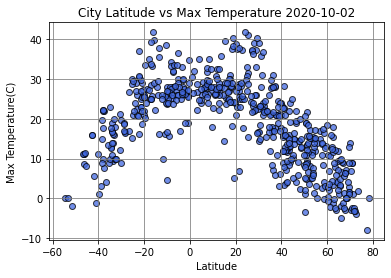

In [9]:
# Using python datetime module to determine current date at time of analysis
date_of_analysis = datetime.date(datetime.now())

# Using pyplot to plot chart
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], facecolor="royalblue", edgecolors="black", marker="o", alpha=0.75)
plt.title(f"City Latitude vs Max Temperature {date_of_analysis}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")
plt.grid(b=True, which="major", axis="both", linestyle="-", color="grey")

# Save chart as png file
plt.savefig("./output/latitude_vs_temp.png")

# Show chart
plt.show()

This scatter plot shows how a city's maximum temperature is affected by its latitude. The temperatures are highest close to the equator. The temperatures decline moving away from the equator, both towards the north and south. The temperatures in both hemispheres are similar due to the time of the year, both hemispheres experiencing autumn and spring respectively. It can be concluded from this chart that temperatures are highest closest to the equator, and they are lowest for both hemispheres (during this time of year) as cities in these regions transition into summer and winter.

## Latitude vs. Humidity Plot

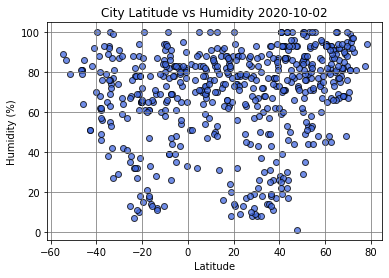

In [10]:
# Using pyplot to plot chart
plt.scatter(weather_df["Lat"], weather_df["Humidity"], facecolor="royalblue", edgecolors="black", marker="o", alpha=0.75)
plt.title(f"City Latitude vs Humidity {date_of_analysis}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(b=True, which="major", axis="both", linestyle="-", color="grey")

# Save chart as png file
plt.savefig("./output/latitude_vs_humidity.png")

# Show chart
plt.show()

This scatter plot shows how a city's humidity is affected by its latitude. The data points are quite evenly scattered throughout the chart. This is an indication of a weak correlation between latitude and humidity as humidity is not much affected by a city's position to the equator. However, it is worth noting that most cities have higher humidities of 60-100% regardless of their latitudes. There are few cities with extremely low humidities situated close to the equator.

## Latitude vs. Cloudiness Plot

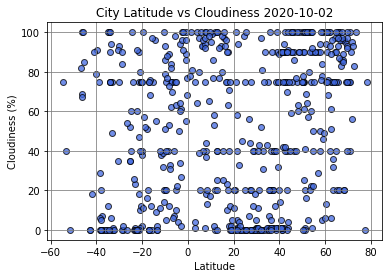

In [11]:
# Using pyplot to plot chart
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], facecolor="royalblue", edgecolors="black", marker="o", alpha=0.75)
plt.title(f"City Latitude vs Cloudiness {date_of_analysis}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(b=True, which="major", axis="both", linestyle="-", color="grey")

# Save chart as png file
plt.savefig("./output/latitude_vs_cloudiness.png")

# Show chart
plt.show()

This scatter plot shows how a city's cloudiness is affected by its latitude. By observing the graph, most cities have cloudiness either really high or really low. These cities with similar cloudiness are also located in different latitudinal positions. As the data is quite evenly spread throughout the graph, this suggests that there is no correlation between the latitude and cloudiness.

## Latitude vs. Wind Speed Plot

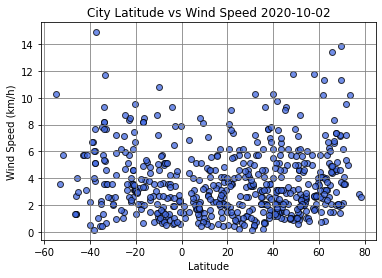

In [12]:
# Using pyplot to plot chart
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], facecolor="royalblue", edgecolors="black", marker="o", alpha=0.75)
plt.title(f"City Latitude vs Wind Speed {date_of_analysis}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (km/h)")
plt.grid(b=True, which="major", axis="both", linestyle="-", color="grey")

# Save chart as png file
plt.savefig("./output/latitude_vs_windspeed.png")

# Show chart
plt.show()

This scatter plot shows how a city's wind speed is affected by its latitude. By observing the graph, most of the data points are clustered around the lower ranges of the graph. This shows that cities regardless of their latitudinal positions generally experience lower to moderate wind speeds. As the data points are quite evenly spread throughout the graph, there is a weak correlation between latitude and wind speed. It is also worth noting that some cities further away from the equator (latitude 20 to 40 and latitude -40 to -60) have higher wind speeds.

## Linear Regression

In [13]:
# Create a function to plot linear regression
def create_linear_regression_plot(x_values, y_values, x_label, y_label, hemisphere, line_placement, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    # Using pyplot to create scatter plot
    plt.scatter(x_values, y_values)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if ylim != None:
        plt.ylim = (0, ylim)
    today = datetime.date(datetime.now())
    plt.title(f'{hemisphere} Hemisphere - {x_label} vs. {y_label} {today}')
    plt.annotate(line_eq,line_placement,fontsize=15,color="red")
    
    # Print r-squared value
    print(f"The r-squared is: {rvalue**2}")
    
    # Print correlation between both factors
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    
    # Save linear regression plot as png file
    plt.savefig(f"./output/{hemisphere}_{x_label}_vs_{y_label}.png")
    
    return plt.plot(x_values,regress_values,"r-")

In [14]:
# Create Nothern and Souther Hemisphere DataFrames
nothern_hemisphere = weather_df.loc[weather_df["Lat"] > 0]
southern_hemisphere = weather_df.loc[weather_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6491137776772836
The correlation between both factors is -0.81


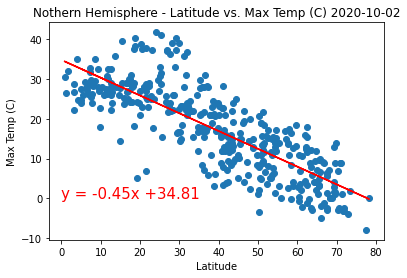

In [15]:
x_values = nothern_hemisphere["Lat"]
y_values = nothern_hemisphere["Max Temp"]

create_linear_regression_plot(x_values, y_values, "Latitude", "Max Temp (C)", "Nothern", (0, 0), ylim=None)

The linear regression model above shows a strong negative correlation between latitude and maximum temperature in the northern hemisphere. This means that it is getting colder as we move further away from the equator towards north. This model shows that cities further up the nothern hemisphere generally experience colder temperatures compared to countries closer to the equator. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.49441770083100545
The correlation between both factors is 0.7


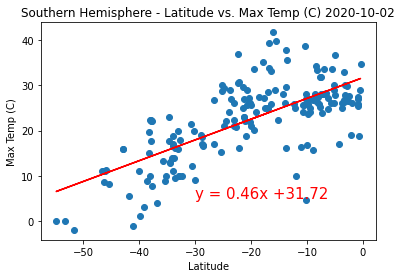

In [16]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Max Temp"]

create_linear_regression_plot(x_values, y_values, "Latitude", "Max Temp (C)", "Southern", (-30, 5), ylim=None)

The linear regression model above shows a strong positive correlation between latitude and maximum temperature in the southern hemisphere. This model shows that cities are generally warmer closer to the equator and cooler further south.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.04571109098503737
The correlation between both factors is 0.21


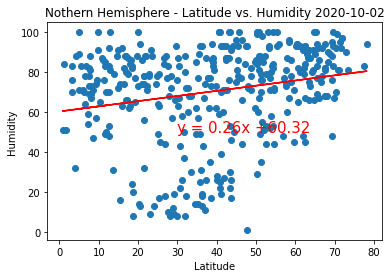

In [17]:
x_values = nothern_hemisphere["Lat"]
y_values = nothern_hemisphere["Humidity"]

create_linear_regression_plot(x_values, y_values, "Latitude", "Humidity", "Nothern", (30, 50), ylim=None)

The linear regression model above shows a very weak positive correlation between latitude and humidity in the northern hemisphere. This means that the humidity of cities increase slightly moving further away from the equator. However, the relatively flat slope of the model indicates that the increase in humidity is only minor.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0039815036643816625
The correlation between both factors is -0.06


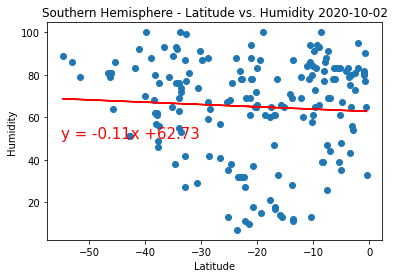

In [18]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]

create_linear_regression_plot(x_values, y_values, "Latitude", "Humidity", "Southern", (-55,50), ylim=None)

The linear regression model above shows no correlation between latitude and humidity in the southern hemisphere. The flat nature of the model's slope indicates that the humidity change is very insignificant. Also, it is worth mentioning that most cities are clustered at the higher ranges of humidity. Therefore, suggesting that most cities in the southern hemisphere are generally more humid regardless of their latitudinal positions (this time of the year at least).

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.06653245616133227
The correlation between both factors is 0.26


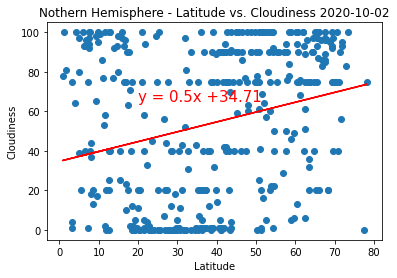

In [19]:
x_values = nothern_hemisphere["Lat"]
y_values = nothern_hemisphere["Cloudiness"]

create_linear_regression_plot(x_values, y_values, "Latitude", "Cloudiness", "Nothern", (20, 65), ylim=None)

The linear regression model above shows a very weak (or possibly none) positive correlation between latitude and cloudiness in the northern hemisphere. This is supposed to mean that the cloudiness should be increasing as we move further up north. However, due to the scattered nature of the data points, we can be confident that there exists no relationship between latitude and cloudiness in the northern hemisphere. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.020813679246994506
The correlation between both factors is 0.14


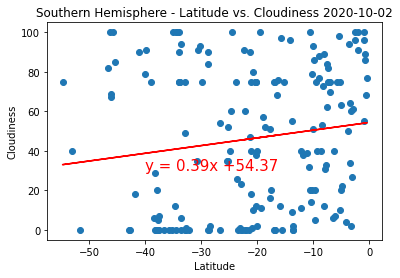

In [20]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Cloudiness"]

create_linear_regression_plot(x_values, y_values, "Latitude", "Cloudiness", "Southern", (-40, 30), ylim=None)

The linear regression model above shows a very weak (or possibly none) positive correlation between latitude and cloudiness in the southern hemisphere. This is supposed to mean that the cloudiness should be increasing as we move closer to the equator. However, due to the scattered nature of the data points, we can be confident that there exists no relationship between latitude and cloudiness in the southern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.045239960681696306
The correlation between both factors is 0.21


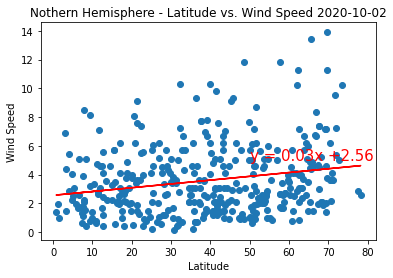

In [21]:
x_values = nothern_hemisphere["Lat"]
y_values = nothern_hemisphere["Wind Speed"]

create_linear_regression_plot(x_values, y_values, "Latitude", "Wind Speed", "Nothern", (50,5), ylim=None)

The linear regression model above shows a very weak positive correlation between latitude and wind speed in the northern hemisphere. This is supposed to mean that the wind speeds should be increasing as we move closer to the equator. However, most of the data points are scattered evenly within the ranges of low to moderate wind speeds, showing that most cities experience similar wind speeds regardless of their latitudinal positions. Thus, indicating that a relationship between latitude and wind speed in the northern hemisphere does not exist.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.04277170746544409
The correlation between both factors is -0.21


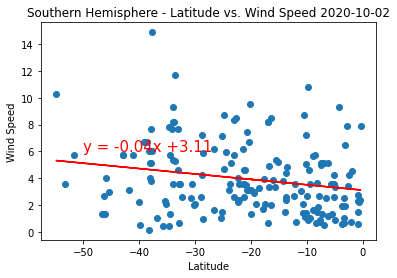

In [22]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]

create_linear_regression_plot(x_values, y_values, "Latitude", "Wind Speed", "Southern", (-50, 6), ylim=None)

The linear regression model above shows a very weak negative correlation between latitude and wind speed in the southern hemisphere. This is supposed to mean that the wind speeds should be decreasing as we move closer to the equator. Despite a few potential outliers, the other data points are quite evenly scattered, with them clustered in the lower ranges of wind speed. This shows that there is not a relationship between latitude and wind speed in the southern hemisphere.